In [51]:
from montecarlo import Die, Game, Analyzer
import matplotlib.pyplot as plt

# Scenario 1: 2-headed coin

In [2]:
faircoin = Die(faces=["H","T"])
unfaircoin = Die(faces=["H","T"])
unfaircoin.change_the_weight(facevalue="T",newWeight=5)

In [3]:
faircoin.weights

[1, 1]

In [4]:
unfaircoin.weights

[1, 5.0]

In [7]:
fairGame = Game(dieList=[faircoin,faircoin,faircoin])
fairGame.play(times=1000)

,Die Number 1,Die Number 2,Die Number 3
Roll Number,,,
1,T,H,T
2,H,H,T
3,H,H,T
4,T,H,H
5,H,H,T
...,...,...,...
996,T,T,H
997,H,H,T
998,T,H,T


In [8]:
unfairGame = Game(dieList=[unfaircoin,unfaircoin,faircoin])
unfairGame.play(times=1000)

,Die Number 1,Die Number 2,Die Number 3
Roll Number,,,
1,T,T,T
2,H,T,H
3,T,T,H
4,H,H,H
5,H,T,T
...,...,...,...
996,H,T,T
997,H,H,T
998,T,T,H


In [9]:
fairAnalyzer = Analyzer(fairGame)
unfairAnalyzer = Analyzer(unfairGame)

In [13]:
fairjackpotfreq = fairAnalyzer.jackpot()
fairjackpotfreq

225

In [14]:
unfairjackpotfreq=unfairAnalyzer.jackpot()
unfairjackpotfreq

381

The relative frequency of jackpots in the fair game with only fair coins was 225/1000, or 22.5%. The relative frequency of jackpots in the unfair game with 2 unfair coins and 1 fair coin was 381/1000 or 38.1%.

(0.0, 1000.0)

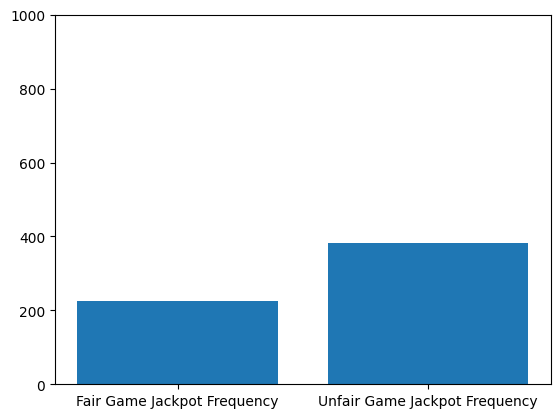

In [24]:
plt.bar(x=["Fair Game Jackpot Frequency", "Unfair Game Jackpot Frequency"],height=[fairjackpotfreq,unfairjackpotfreq])
plt.ylim(0, 1000)


# Scenario 2: 6-sided die

In [26]:
fairall = Die(faces=[1,2,3,4,5,6])
unfair6 = Die(faces=[1,2,3,4,5,6])
unfair1 = Die(faces=[1,2,3,4,5,6])

In [27]:
unfair6.change_the_weight(facevalue=6, newWeight=5)
unfair1.change_the_weight(facevalue=1, newWeight=5)

In [28]:
unfair1.weights

[5.0, 1, 1, 1, 1, 1]

In [29]:
unfair6.weights

[1, 1, 1, 1, 1, 5.0]

In [31]:
fairallgame = Game(dieList=[fairall,fairall,fairall,fairall,fairall])
unfair16game = Game(dieList=[unfair6,unfair6,unfair1,fairall,fairall])

In [32]:
fairallgame.play(times=10000)

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
1,5,5,3,3,2
2,4,3,5,4,3
3,3,4,5,5,5
4,2,2,4,3,3
5,3,4,1,4,4
...,...,...,...,...,...
9996,4,6,1,2,5
9997,4,3,1,2,2
9998,4,3,2,3,1


In [33]:
unfair16game.play(times=10000)

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
1,5,5,5,1,6
2,5,2,1,5,4
3,6,6,1,1,6
4,6,6,1,1,2
5,6,5,1,3,5
...,...,...,...,...,...
9996,6,1,3,6,2
9997,6,3,1,1,2
9998,5,4,1,5,6


In [34]:
fairallscore = Analyzer(fairallgame)
unfair16score = Analyzer(unfair16game)

In [38]:
fairallfreq = fairallscore.jackpot()
fairallfreq

5

In [39]:
unfair16freq = unfair16score.jackpot()
unfair16freq

8

The relative frequency of jackpots in the game of 5 fair dice was 5/10000, or 0.05%. The relative frequency of jackpots in the game of 2 fair dice, 2 unfair dice of Type 1 and 1 unfair dice of Type 2 was 8/10000 or 0.08%.

<BarContainer object of 2 artists>

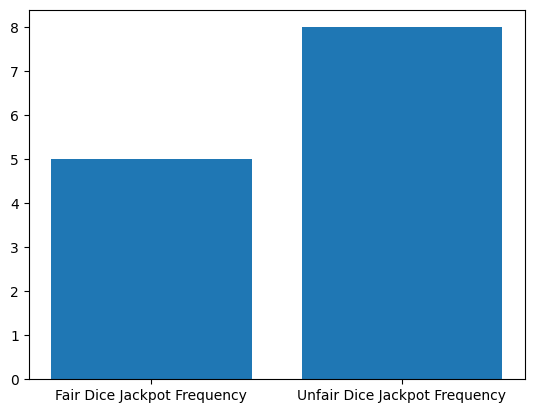

In [41]:
plt.bar(x=["Fair Dice Jackpot Frequency", "Unfair Dice Jackpot Frequency"],height=[fairallfreq,unfair16freq])

If this bar graph were shown on a relative scale to show all 10,000 rolls, the scale becomes so large that the jackpots cannot be seen.

In [61]:
fairallcombos = fairallscore.combinations().head(n=10)
fairallcombos

,Frequency of Combination
"[1, 2, 4, 5, 6]",175
"[1, 2, 3, 4, 5]",169
"[1, 3, 4, 5, 6]",162
"[2, 3, 4, 5, 6]",160
"[1, 2, 3, 5, 6]",150
"[1, 2, 3, 4, 6]",149
"[1, 1, 2, 3, 5]",97
"[2, 4, 5, 5, 6]",96
"[1, 1, 3, 4, 5]",94
"[1, 2, 2, 3, 5]",93


<AxesSubplot: >

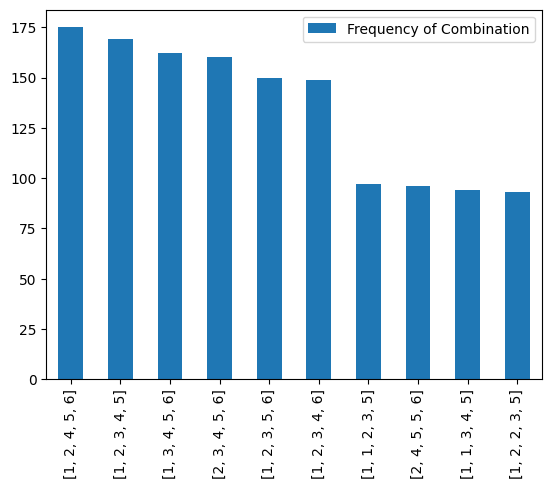

In [66]:
fairallcombos.plot.bar()

In [68]:
unfair16combos = unfair16score.combinations().head(n=10)
unfair16combos

,Frequency of Combination
"[1, 2, 3, 6, 6]",214
"[1, 2, 5, 6, 6]",208
"[1, 4, 5, 6, 6]",207
"[1, 3, 4, 6, 6]",201
"[1, 2, 4, 6, 6]",193
"[1, 3, 4, 5, 6]",184
"[1, 2, 4, 5, 6]",176
"[1, 3, 5, 6, 6]",175
"[1, 2, 3, 4, 6]",166
"[1, 2, 3, 5, 6]",161


<AxesSubplot: >

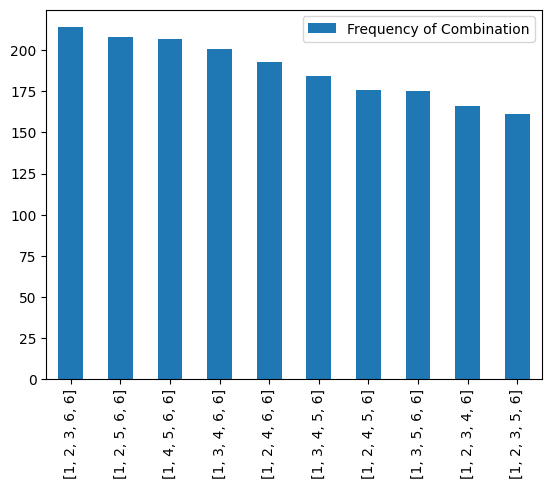

In [70]:
unfair16combos.plot.bar()

# Scenario 3: Roman Alphabet

In [76]:
alpha = Die(faces=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])
alphafaces = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
alphaweights = [8.4966,2.0720,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,0.2902,1.7779,0.2722]


In [77]:
weightloop = 0
while weightloop < 26:
    alpha.change_the_weight(facevalue=alphafaces[weightloop],newWeight=alphaweights[weightloop])
    weightloop += 1

In [79]:
alpha.die.sort_values(by=['face'])

,face,weight
22,a,8.4966
23,b,2.0720
13,c,4.5388
3,d,3.3844
15,e,11.1607
19,f,1.8121
6,g,2.4705
12,h,3.0034
0,i,7.5448
24,j,0.1965


In [80]:
alphagame = Game(dieList=[alpha,alpha,alpha,alpha,alpha])

In [81]:
alphagame.play(times=1000)

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
1,n,r,u,y,l
2,t,v,r,l,u
3,l,n,u,f,p
4,m,a,r,s,t
5,u,r,l,s,l
...,...,...,...,...,...
996,e,e,n,n,y
997,r,e,a,n,a
998,a,b,l,w,u


In [84]:
samplegenerated1 = alphagame.gameresults.sample(n=10)

In [85]:
samplegenerated1

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
945,g,l,p,n,c
715,t,n,p,a,p
862,c,l,u,a,a
654,a,l,a,a,o
447,i,s,l,u,t
58,c,r,h,c,a
272,p,e,u,b,a
768,e,i,v,r,a
658,r,b,e,h,e


Sample #1 generated 0/10 English words.

In [86]:
samplegenerated2 = alphagame.gameresults.sample(n=10)
samplegenerated2

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
788,e,c,i,e,o
197,a,t,e,t,h
503,r,i,a,l,n
732,i,a,l,l,u
765,p,d,m,o,l
404,k,i,a,s,b
415,l,r,o,s,h
703,v,e,e,u,s
886,u,e,y,u,y


Sample #2 generated 0/10 English words.

In [87]:
samplegenerated3 = alphagame.gameresults.sample(n=10)
samplegenerated3

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
740,i,i,n,s,f
611,n,y,n,a,u
497,n,l,e,u,b
102,v,t,d,h,p
308,v,p,t,o,i
472,o,e,v,i,r
473,a,n,s,s,k
940,n,r,r,m,e
636,g,a,o,p,w


Sample #3 generated 0/10 English words.

In [88]:
samplegenerated4 = alphagame.gameresults.sample(n=10)
samplegenerated4

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
481,i,a,d,i,k
511,h,o,s,a,h
437,d,h,d,n,o
682,o,l,e,q,a
842,y,f,t,b,d
550,i,t,t,p,l
595,i,e,l,l,u
107,i,r,x,e,l
676,w,d,f,i,e


Sample #4 generated 0/10 English words.

In [89]:
samplegenerated5 = alphagame.gameresults.sample(n=10)
samplegenerated5

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
98,b,o,u,g,o
731,m,s,r,e,n
530,h,i,u,t,a
482,p,u,e,o,o
938,i,s,b,i,b
386,h,t,d,h,v
660,t,r,a,n,a
536,l,i,n,c,t
767,r,t,r,a,b


Sample #5 generated 0/10 English words.

In [90]:
samplegenerated6 = alphagame.gameresults.sample(n=10)
samplegenerated6

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
591,l,e,h,y,e
537,e,n,o,r,g
643,r,u,e,i,i
233,n,w,o,e,b
117,d,n,s,y,a
601,f,u,t,i,p
118,u,d,n,a,t
604,p,e,o,n,e
105,i,e,l,v,t


Sample #6 generated 0/10 English words.

In [91]:
samplegenerated7 = alphagame.gameresults.sample(n=10)
samplegenerated7

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
839,a,a,i,d,r
15,h,l,r,d,t
861,d,d,e,r,o
518,t,n,o,g,i
708,z,s,o,e,b
304,y,e,i,a,g
829,a,e,d,e,r
837,i,a,o,p,e
551,e,y,d,o,v


Sample #7 generated 0/10 English words.

In [92]:
samplegenerated8 = alphagame.gameresults.sample(n=10)
samplegenerated8

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
574,o,t,o,h,o
648,m,s,e,r,i
132,u,g,c,t,i
114,i,y,n,i,a
711,i,o,i,r,b
416,s,u,o,i,g
969,i,c,o,e,o
877,a,t,s,s,r
540,e,s,i,c,n


Sample #8 generated 0/10 English words.

In [93]:
samplegenerated9 = alphagame.gameresults.sample(n=10)
samplegenerated9

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
37,i,g,a,y,t
727,c,n,e,w,n
563,e,e,u,l,m
943,a,d,k,o,g
124,o,e,t,i,e
669,i,a,m,c,a
348,a,m,x,o,o
493,r,a,k,a,a
244,a,o,p,a,c


Sample #9 generated 0/10 English words.

In [94]:
samplegenerated10 = alphagame.gameresults.sample(n=10)
samplegenerated10

,Die Number 1,Die Number 2,Die Number 3,Die Number 4,Die Number 5
Roll Number,,,,,
838,s,s,l,t,a
909,r,e,w,b,i
759,a,s,y,a,l
477,o,c,e,g,n
564,e,e,n,n,i
141,a,m,r,a,s
740,i,i,n,s,f
97,t,g,o,a,h
201,u,a,f,h,o


Sample #10 generated 1/10 English words - _amras_ which are hog plums of India.

## For all 10 samples, the total English words were 1. This estimates that 1% of the data contains English words.